## 先到Device_Libraty讀取my_236的package

In [1]:
import os
os.chdir("C:/Users/USER/Device_Library/Device_Library/")

from my_K236 import my_K236
import numpy as np
import time, datetime, device_query,tqdm
import pyvisa as visa 
from datetime import date
from pymeasure.instruments.keithley import Keithley2000
from qcodes.instrument_drivers.oxford.triton import Triton
from statistics import mean, variance
import matplotlib.pyplot as plt
from IPython import display
from tqdm import trange,tqdm
from scipy.optimize import curve_fit

os.chdir("C:/Users/USER/Sean/") ## 回到工作路徑

C:\Users\USER\Anaconda3\lib\site-packages\visa.py:23: FutureWarning: The visa module provided by PyVISA is being deprecated. You can replace `import visa` by `import pyvisa as visa` to achieve the same effect.

The reason for the deprecation is the possible conflict with the visa package provided by the https://github.com/visa-sdk/visa-python which can result in hard to debug situations.
  FutureWarning,


In [2]:
rm = visa.ResourceManager()
rm.list_resources()

('ASRL1::INSTR',
 'ASRL2::INSTR',
 'ASRL3::INSTR',
 'ASRL10::INSTR',
 'GPIB0::23::INSTR',
 'GPIB0::26::INSTR')

## 讀取236並設定compliance

In [3]:
comp = 1e-7 #輸入236的compliance                       ####記得檢查GPIB號碼 CHECK GPIB####
k236_source_1 = my_K236.MY_KEITHLEY236(23, 'SVMI',comp) ### (GPIB#, 給(Source)V量(Measure)I , Compliance)
print(k236_source_1.compliance)    
print(date.today())

1e-07
2021-03-03


# 設定參數

In [4]:
max_V = 1
min_V = -max_V
data_points = 21  # measuring resolution

voltage_min_to_max = np.linspace(min_V, max_V, data_points)

measure_wait_time = 0.01 #0.5
step = 1##5e-2
delay_time = 0.01#0.5

N_ave = 1  ###量幾次取平均 Number of points you want to take for averaging
drawing_resolution = 10 ###多少點畫一次 self explanatory
fontsize = 8

# 路徑設定

In [ ]:
# repeat = '0'  ##### remember to change repeat if you don't want file being overwritten
# file_name = 'Leakage_test_S%s_%s_to_%s_repeat_%s_at_%s'%(pin,min_V,max_V, repeat,date.today())##儲存的檔名 
# folder_path = 'C:/Users/USER/Sean/2020-11-06 QD leakage test/' 
# print('檔名會叫做 >> %s'%file_name) 

# overwrite = 'Y' ## 避免重複執行時資料覆蓋 In case of inadvertent overwrite
# if os.path.isfile('%s%s.txt'%(folder_path,file_name))==True:
#     overwrite = input('Do you want to overwtite the existing file? >>> Y/N  ')
# if overwrite == 'Y':
#     file_name = file_name
# else:
#     file_name = 'AAAAAAAA'
#     print("please create a new file")
#     raise RuntimeError('!!!!  File exsit, please name a new file  !!!!')

# 執行量測

In [ ]:
# k236_source_1.GOTO(min_V, step, delay_time, comp, range_m = 0, reset_compliance=False)
# print("Source drain goes to starting value...")
# print("Initialize K236...")
# k236_source_1.INITIALIZE('SVMI', comp, 0, min_V)  ###(SM, compliance, range_m, init_value=0.0)
# current_measure_xx = np.zeros((len(voltage_min_to_max), N_ave+1)) #製造0矩陣以放入量測數據 creating a zero's array for data input
# plt.figure(figsize=(3,3), dpi=200)
# plt.xlim([min_V,max_V])
#     #plt.xlim([0,max_I])

# print("Apply source drain...")
# start = time.time()
# for index_V, voltage in enumerate(tqdm(voltage_min_to_max)):
#         k236_source_1.GOTO(voltage, step, delay_time, comp, range_m = 0, reset_compliance=False) 
#         time.sleep(measure_wait_time)
#         Sum_of_current = 0
#         # do measurement
#         for n in range(N_ave+1):
#             if n == N_ave:
#                 current_measure_xx[index_V,n] = Sum_of_current/float(N_ave) #加上平均數值 caculating the average
#             else: 
#                 current_measure_xx[index_V,n] = k236_source_1.READ_OUT('M', print_out=False)
#                 Sum_of_current += current_measure_xx[index_V,n]
# #                 print(n,current_measure_xx[index_V,n],Sum_of_current)
# #                 temperature_record[index_V,n] = triton.GET_CURRENT_TEMPERATURE(control_channel)
#                 time.sleep(0.05)

#         if (index_V%drawing_resolution==0):
#             display.clear_output(wait=True)
#             plt.plot(voltage_min_to_max[:index_V+1] , current_measure_xx[:index_V+1,N_ave-1], c='r')#, label='$\\rho_{xy} pin 2-11$')
# #             plt.ylim([voltage_measure.min(),voltage_measure.max()])
#             plt.xlabel("$V$ (V)")
#             plt.xticks(fontsize=fontsize)
#             plt.ylabel("$I$ (A)")
#             plt.yticks(fontsize=fontsize)
#             display.display(plt.gcf())
# #             print("Current temperature is %.4f K."%triton.GET_CURRENT_TEMPERATURE(control_channel))
# time.sleep(0.01)
# display.clear_output(wait=True) ##把圖片清乾淨 Obviously clearing the output
# plt.plot(voltage_min_to_max[:index_V+1] , current_measure_xx[:index_V+1,N_ave-1], c='r')#, label='$\\rho_{xy} pin 2-11$')
# #             plt.ylim([voltage_measure.min(),voltage_measure.max()])
# plt.xlabel("$V$ (V)")
# plt.xticks(fontsize=fontsize)
# plt.ylabel("$I$ (A)")
# plt.yticks(fontsize=fontsize)
# display.display(plt.gcf())
# print("Measurement ends. Returning to ZERO...")
# stop = time.time()
# T=(stop-start)/60
# k236_source_1.GOTO(0.0, step, delay_time, reset_compliance=False)
# display.clear_output(wait=True)
# print("Voltage is now at zero :)")
# print('這次量測花費了 %f 分鐘'%T)

# ## 將資料存成.txt
# raw_data = np.hstack((voltage_min_to_max.reshape(-1,1), current_measure_xx))
# data = np.hstack((voltage_min_to_max.reshape(-1,1), current_measure_xx[:,[-1]]))

# np.savetxt("%sraw_data%s.txt" %(folder_path,file_name),raw_data, fmt="%.8e", \
#            header='V(V)\tI(A)*%d\tI_avg'%(N_ave))

# np.savetxt('%s%s.txt'%(folder_path,file_name),data, fmt="%.8e",comments='',\
#            header='V\tId_avg_of_%s\
#            \n(V)\t(A)\
#            \nfrom%sVto%sV\tpin_number%s\tresolution_%s(V)\tmeasure_wait_time_%s\tgoto_step_%s\tdelay_time_goto_%s'
#            %(N_ave,min_V,max_V,pin,(max_V-min_V)/data_points,measure_wait_time,step,delay_time))

# k236_source_1.GOTO(0.0, step, delay_time, comp, range_m = 0, reset_compliance=False)

In [ ]:
# a,b=0,0
# def CONDUCTANCE(x,a,b):
#     return a*x+b
# current = current_measure_xx[:,[-1]].flatten()
# popt, pcov = curve_fit(CONDUCTANCE, current, voltage_min_to_max)
# print("Differential Conductance is %.13f S\nDifferentialResistance is %.6f Ω." %(1/popt[0],popt[0]))

## 包起來

In [ ]:
def leak(pin):
    repeat = '0'  ##### remember to change repeat if you don't want file being overwritten
    file_name = 'Leakage_test_S%s_%s_to_%s_repeat_%s_at_%s'%(pin,min_V,max_V, repeat,date.today())##儲存的檔名 
    folder_path = 'C:/Users/USER/Sean/resistance test for ppt/'    ##2020-11-06 QD leakage test/' 
    print('檔名會叫做 >> %s'%file_name) 

    overwrite = 'Y' ## 避免重複執行時資料覆蓋 In case of inadvertent overwrite
    if os.path.isfile('%s%s.txt'%(folder_path,file_name))==True:
        overwrite = input('Do you want to overwtite the existing file? >>> Y/N  ')
    if overwrite == 'Y':
        file_name = file_name
    else:
        file_name = 'AAAAAAAA'
        print("please create a new file")
        raise RuntimeError('!!!!  File exsit, please name a new file  !!!!')

    k236_source_1.GOTO(min_V, step, delay_time, comp, range_m = 0, reset_compliance=False)
    print("Source drain goes to starting value...")
    print("Initialize K236...")
    k236_source_1.INITIALIZE('SVMI', comp, 0, min_V)  ###(SM, compliance, range_m, init_value=0.0)
    current_measure_xx = np.zeros((len(voltage_min_to_max), N_ave+1)) #製造0矩陣以放入量測數據 creating a zero's array for data input
    plt.figure(figsize=(3,3), dpi=200)
    plt.xlim([min_V,max_V])
        #plt.xlim([0,max_I])

    print("Apply source drain...")
    start = time.time()
    for index_V, voltage in enumerate(tqdm(voltage_min_to_max)):
            k236_source_1.GOTO(voltage, step, delay_time, comp, range_m = 0, reset_compliance=False) 
            time.sleep(measure_wait_time)
            Sum_of_current = 0
            # do measurement
            for n in range(N_ave+1):
                if n == N_ave:
                    current_measure_xx[index_V,n] = Sum_of_current/float(N_ave) #加上平均數值 caculating the average
                else: 
                    current_measure_xx[index_V,n] = k236_source_1.READ_OUT('M', print_out=False)
                    Sum_of_current += current_measure_xx[index_V,n]
    #                 print(n,current_measure_xx[index_V,n],Sum_of_current)
    #                 temperature_record[index_V,n] = triton.GET_CURRENT_TEMPERATURE(control_channel)
                    time.sleep(0.05)

            if (index_V%drawing_resolution==0):
                display.clear_output(wait=True)
                plt.plot(voltage_min_to_max[:index_V+1] , current_measure_xx[:index_V+1,N_ave-1], c='r')#, label='$\\rho_{xy} pin 2-11$')
    #             plt.ylim([voltage_measure.min(),voltage_measure.max()])
                plt.xlabel("$V$ (V)")
                plt.xticks(fontsize=fontsize)
                plt.ylabel("$I$ (A)")
                plt.yticks(fontsize=fontsize)
                display.display(plt.gcf())
    #             print("Current temperature is %.4f K."%triton.GET_CURRENT_TEMPERATURE(control_channel))
    time.sleep(0.01)
    display.clear_output(wait=True) ##把圖片清乾淨 Obviously clearing the output
    plt.plot(voltage_min_to_max[:index_V+1] , current_measure_xx[:index_V+1,N_ave-1], c='r')#, label='$\\rho_{xy} pin 2-11$')
    #             plt.ylim([voltage_measure.min(),voltage_measure.max()])
    plt.xlabel("$V$ (V)")
    plt.xticks(fontsize=fontsize)
    plt.ylabel("$I$ (A)")
    plt.yticks(fontsize=fontsize)
    display.display(plt.gcf())
    print("Measurement ends. Returning to ZERO...")
    stop = time.time()
    T=(stop-start)/60
    k236_source_1.GOTO(0.0, step, delay_time, reset_compliance=False)
    display.clear_output(wait=True)
    print("Voltage is now at zero :)")
    print('這次量測花費了 %f 分鐘'%T)

    ## 將資料存成.txt
    raw_data = np.hstack((voltage_min_to_max.reshape(-1,1), current_measure_xx))
    data = np.hstack((voltage_min_to_max.reshape(-1,1), current_measure_xx[:,[-1]]))

    np.savetxt("%sraw_data%s.txt" %(folder_path,file_name),raw_data, fmt="%.8e", \
               header='V(V)\tI(A)*%d\tI_avg'%(N_ave))

    np.savetxt('%s%s.txt'%(folder_path,file_name),data, fmt="%.8e",comments='',\
               header='V\tId_avg_of_%s\
               \n(V)\t(A)\
               \nfrom%sVto%sV\tpin_number%s\tresolution_%s(V)\tmeasure_wait_time_%s\tgoto_step_%s\tdelay_time_goto_%s'
               %(N_ave,min_V,max_V,pin,(max_V-min_V)/data_points,measure_wait_time,step,delay_time))

    k236_source_1.GOTO(0.0, step, delay_time, comp, range_m = 0, reset_compliance=False)    

    a,b=1e9,0
    def CONDUCTANCE(x,a,b):
        return a*x+b
    current = current_measure_xx[:,[-1]].flatten()
    popt, pcov = curve_fit(CONDUCTANCE, current, voltage_min_to_max)
    #popt, pcov = curve_fit(lambda x : a*x+b, current, voltage_min_to_max)
    print("Differential Conductance is %.13f S\nDifferentialResistance is %.6f Ω." %(1/popt[0],popt[0]))
    return (pin)

# 上面全跑一次然後按這裡就好 leak(pin#)

In [ ]:
leak(0)

## 手動歸零

In [ ]:
k236_source_1.GOTO(0.0, step, delay_time, comp, range_m = 0, reset_compliance=False)

Voltage is now at zero :)
這次量測花費了 0.404746 分鐘
Differential Conductance is 1.0000000000000 S
DifferentialResistance is 1.000000 Ω.


0

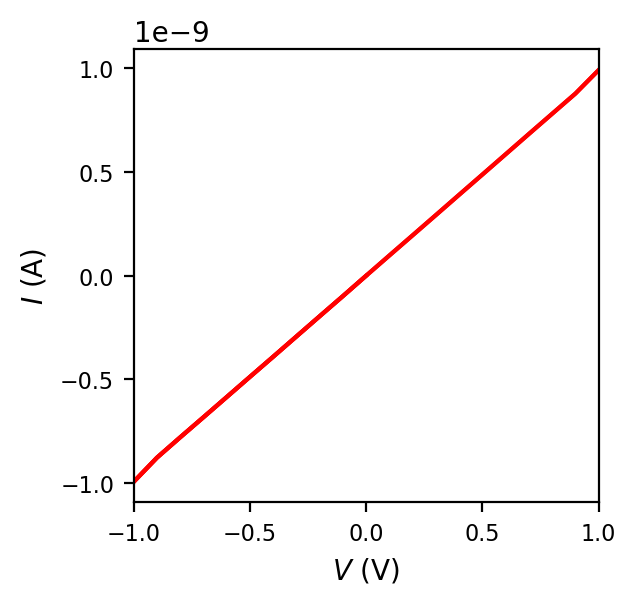

In [54]:
leak(0)